<a href="https://colab.research.google.com/github/LimPeiTing/Portfolio-Project/blob/main/ML_Neural_Network_(NN)_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset from UCI Machine Learning_Kaggle: (Diabetes) https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Data Exploration

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

# there is no null value in the dataset

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

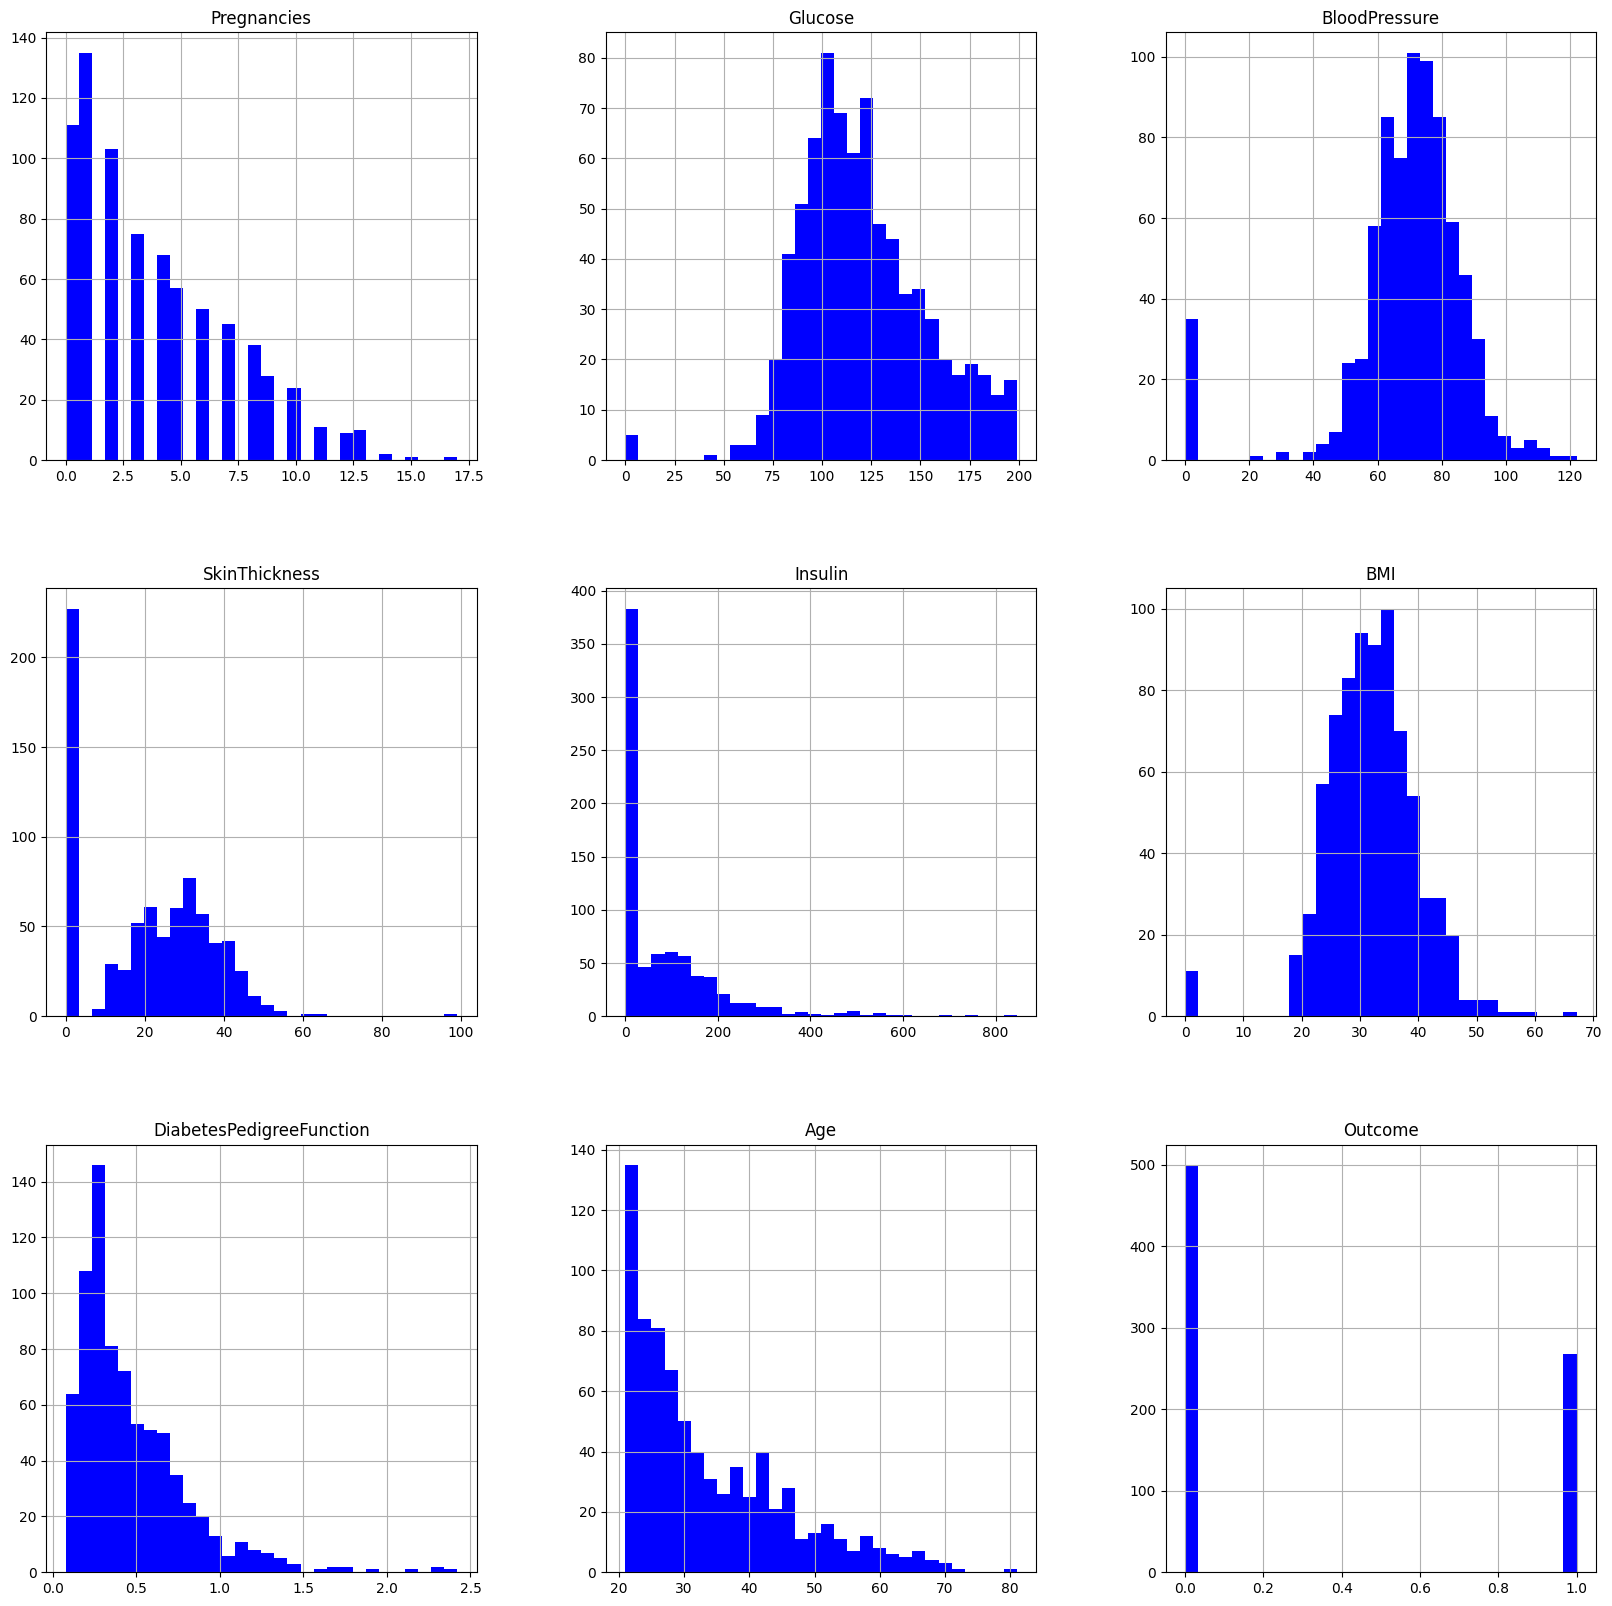

In [9]:
df.hist(bins = 30, figsize=(20, 20), color = 'blue')

In [10]:
len((df[df['Outcome']==1])), len((df[df['Outcome']==0]))

# there are 268 women with diabetes and 500 women with non-diabetes

(268, 500)

In [11]:
# to have an overview of the diabetes and non-diabetes by each independent variable in the dataset

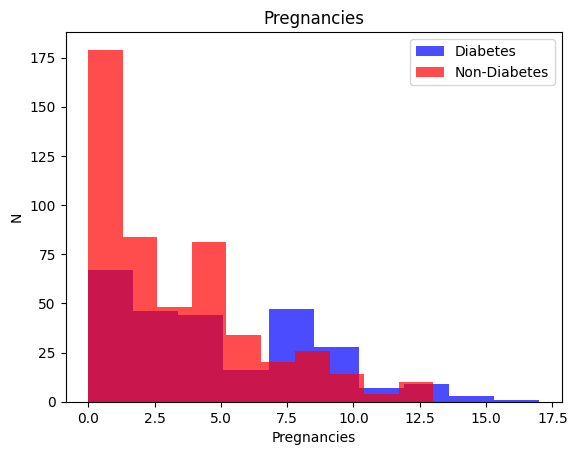

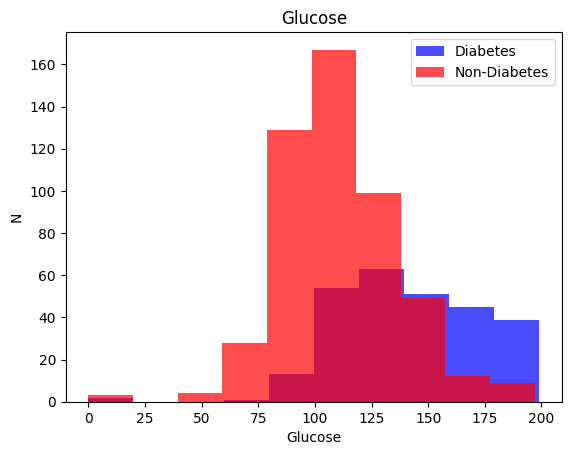

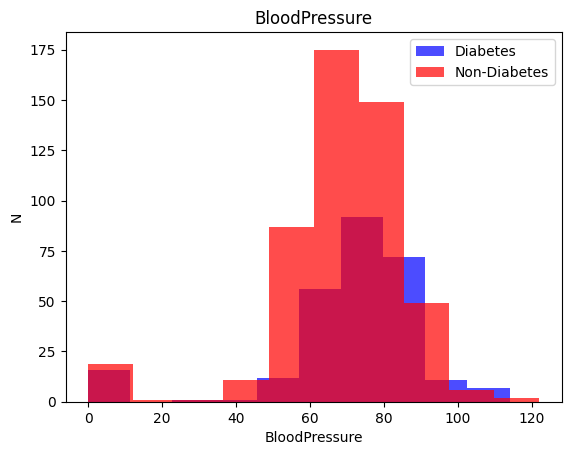

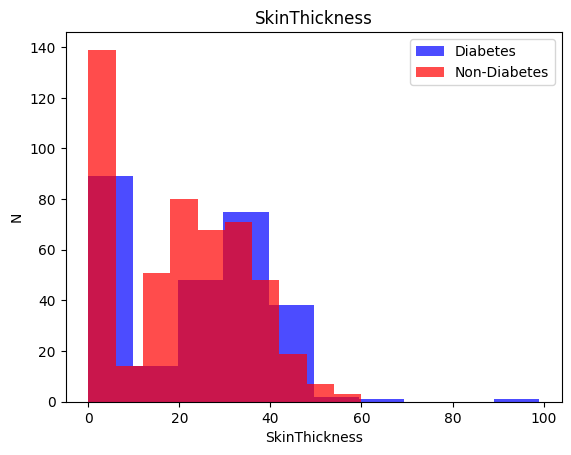

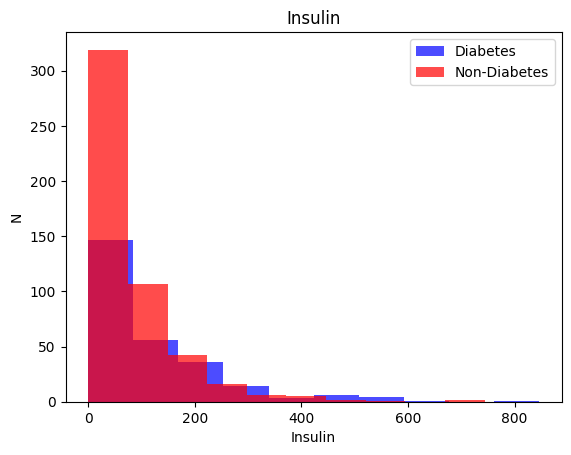

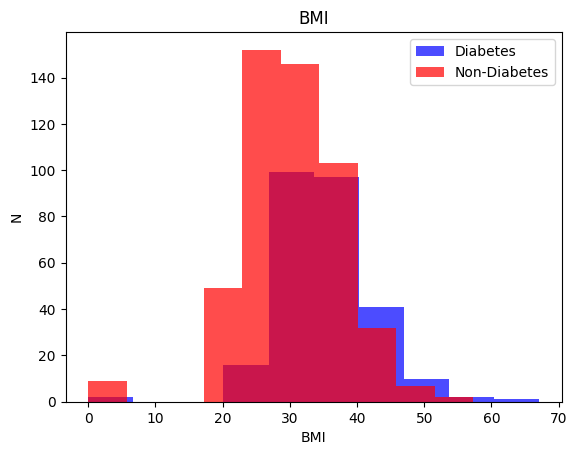

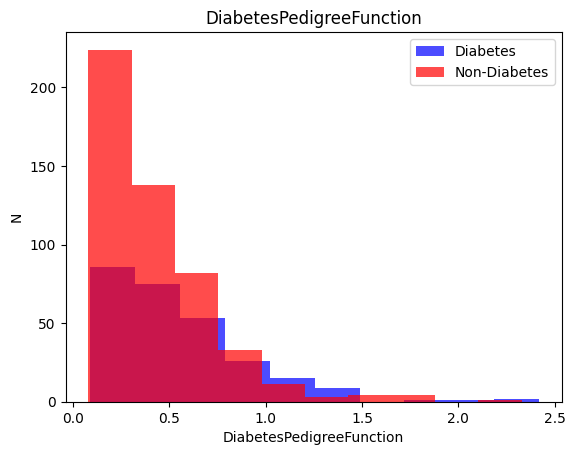

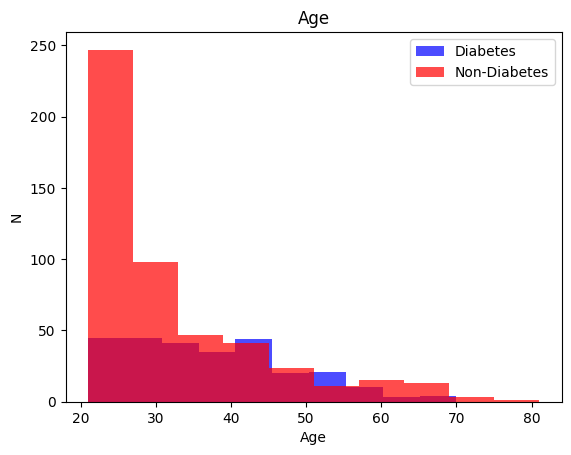

In [12]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7)
    plt.hist(df[df['Outcome']==0][label], color='red', label='Non-Diabetes', alpha=0.7)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('N')
    plt.legend()
    plt.show()

# noticed that it is hard to see the chart for both diabetes and non-diabetes, put in alpha=0.7 in order to see both of the variables clearly

In [13]:
# observed that the dataset for diabetes and non-diabetes are not equal, hence normalize the dataset in order to be fair enough
# add density = True, to get the probability

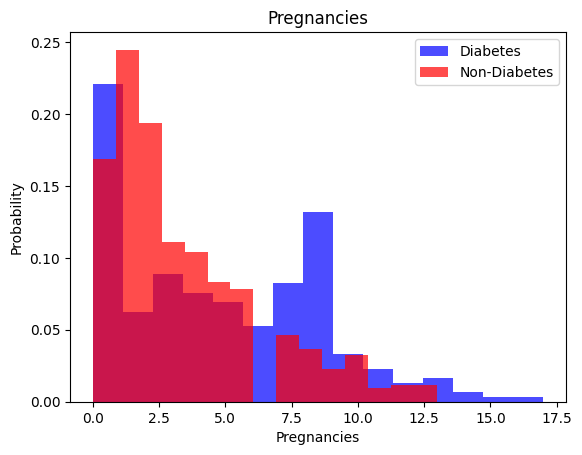

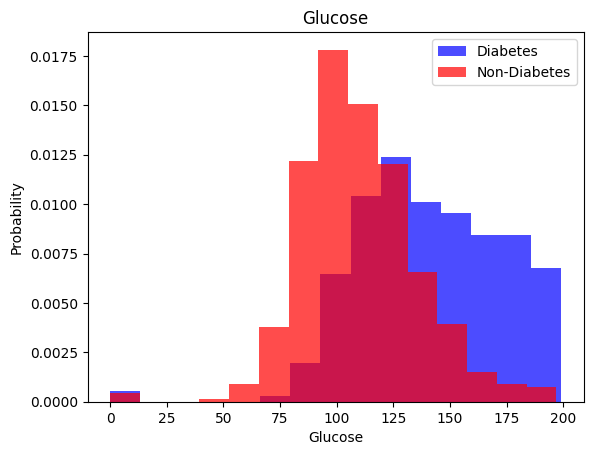

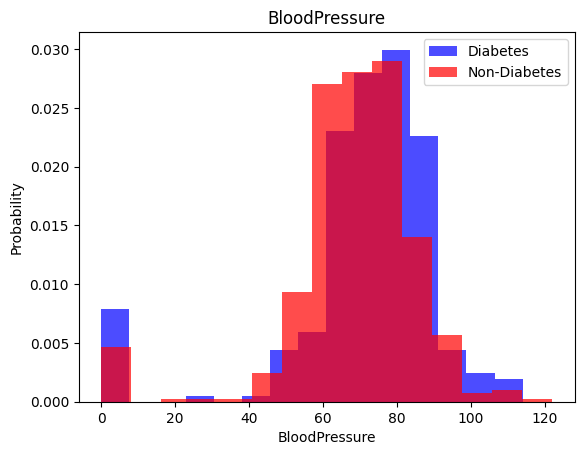

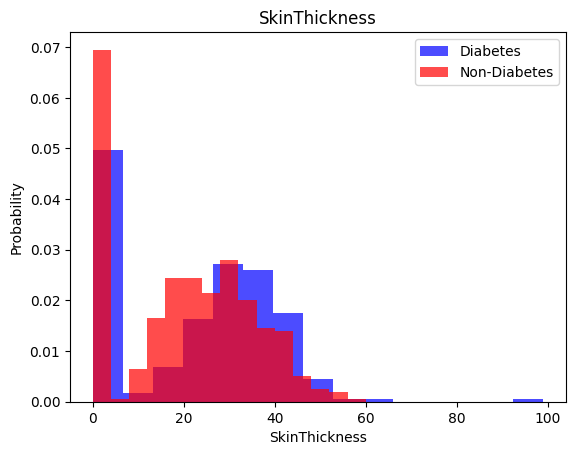

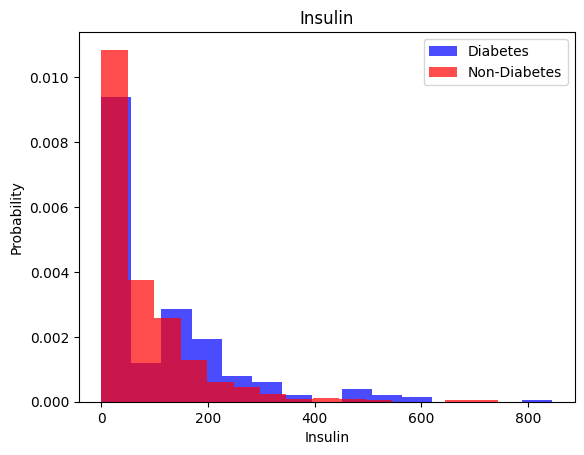

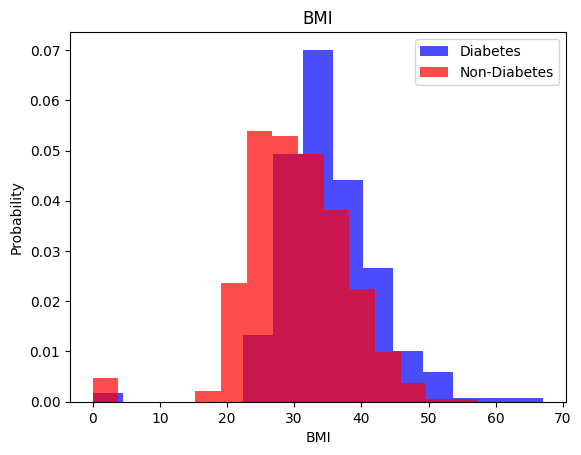

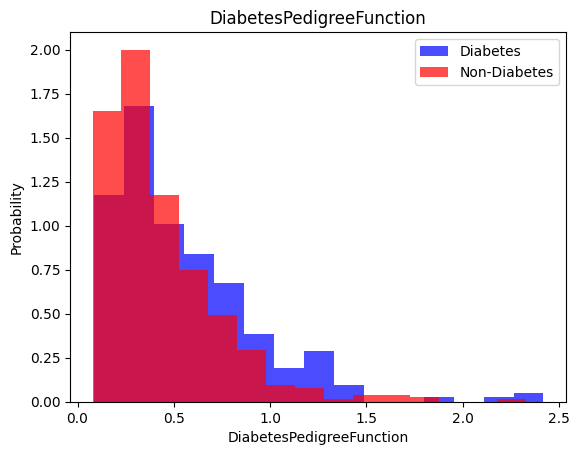

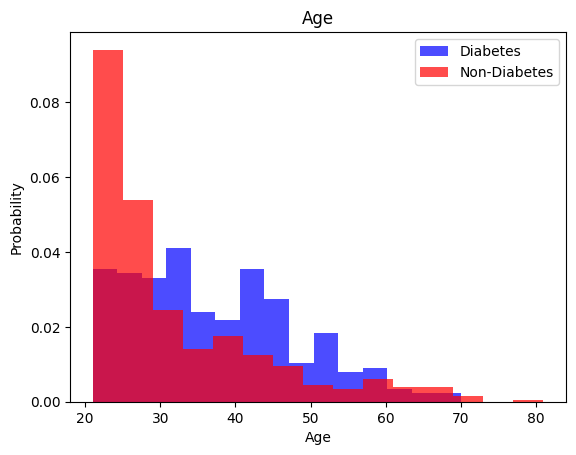

In [14]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
    plt.hist(df[df['Outcome']==0][label], color='red', label='Non-Diabetes', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [15]:
# from the plot, cannot really tell which independent variable will cause diabetes or not
# Hence, machine learning is good to be use to do the prediction

Machine Learning: Neural Network (NN)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [17]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [18]:
X.shape, y.shape

# X is 2-dimensional and y is 1-dimensional

((768, 8), (768,))

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0) # for training set
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0) # for validation set

In [20]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

# relu: # if x <= 0 --> 0, x > 0 --> x
# the last layer (output) is 1

Compile the model

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# using Adam optimizer (Optimizer that implements the Adam algorithm), using default learning rate 0.001
# optimizer: base class for Keras optimizer
# since our output is in binary class, we will be using Keras loss (BinaryCrossEntropy)

In [22]:
model.evaluate(X_train, y_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5962 - loss: 9.5742


[8.855161666870117, 0.5978260636329651]

In [23]:
model.evaluate(X_valid, y_valid)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6045 - loss: 7.4619 


[7.9816670417785645, 0.5779221057891846]

In [24]:
# from the above X_train, y_train, X_valid and y_valid accuracy are low due to we not yet done any training for the model yet

In [25]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

# batch_size: the number of sample / training sample (in this case, how many women data we take)
# epochs: how many iteration through the dataset we gonna train this
# validation_data: check for validation loss and accuracy

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5404 - loss: 6.5501 - val_accuracy: 0.4286 - val_loss: 3.7238
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4393 - loss: 2.7178 - val_accuracy: 0.4935 - val_loss: 1.9686
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4866 - loss: 1.8073 - val_accuracy: 0.4740 - val_loss: 1.6011
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4832 - loss: 1.4436 - val_accuracy: 0.5584 - val_loss: 1.1582
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6060 - loss: 1.0430 - val_accuracy: 0.5714 - val_loss: 1.0465
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6211 - loss: 0.8593 - val_accuracy: 0.6039 - val_loss: 1.0073
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6174 - loss: 0.8960 - val_accuracy: 0.5844 - val_loss: 0.9715
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6395 - loss: 0.8043 - val_accuracy: 0.5779 - val_loss:

In [26]:
# from the above training, we can see that the loss is decreasing and the accuracy is increasing

In [27]:
# let's make our dataset better to improve the result
# from our dataset, our features are so different in terms of their range (for instance: insulin is from 0-800 while DiabetesPedigreeFunction is from 0-2.5)
# this can mess up the result
# hence, we can scale up this

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

# y need to be reshape due to X is 2-dimensional and y is 1-dimensional
# the dimension need to be same in order to make it into dataframe, hence, we will reshape y into 2-dimensional as well by using np.reshape

In [29]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

# the number of non-diabetes and diabetes has a big difference, the dataset is not equal
# we will need to make this both dataset be approximately equal, using RamdomOverSampler

(268, 500)

In [30]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [31]:
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

# after running RandomOverSampler, the dataset for both are equal (500)

(500, 500)

In [32]:
# then we rerun all again to check on the result

Rerun the model again after scaling and RandomOverSampler

In [33]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0) # for training set
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0) # for validation set

In [34]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [37]:
model.evaluate(X_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5514 - loss: 0.6713   


[0.6763827800750732, 0.5533333420753479]

In [38]:
model.evaluate(X_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5536 - loss: 0.6724 


[0.6676828265190125, 0.5550000071525574]

In [39]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5908 - loss: 0.6659 - val_accuracy: 0.7050 - val_loss: 0.6226
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6772 - loss: 0.6306 - val_accuracy: 0.7400 - val_loss: 0.5871
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6933 - loss: 0.5968 - val_accuracy: 0.7550 - val_loss: 0.5574
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7464 - loss: 0.5508 - val_accuracy: 0.7600 - val_loss: 0.5341
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7333 - loss: 0.5666 - val_accuracy: 0.7700 - val_loss: 0.5167
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7583 - loss: 0.5229 - val_accuracy: 0.7600 - val_loss: 0.5041
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7268 - loss: 0.5193 - val_accuracy: 0.7800 - val_loss: 0.4950
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7348 - loss: 0.5283 - val_accuracy: 0.7800 - val_loss:

Evaluate model on test dataset

In [40]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7774 - loss: 0.4218 


[0.45330917835235596, 0.7850000262260437]